In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Data Overview

In [4]:
df = pd.read_csv('country_profile_variables.csv')
df.sample(5)

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Unemployment (% of labour force),International trade: Exports (million US$),International trade: Imports (million US$),Population growth rate (average annual %),Urban population (% of total population),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)"
59,Dominica,Caribbean,750.0,74,98.6,103.0,512.0,-1.8,7051.1,5.5,23,214,0.5,69.5,1.5,82.2/77.7
20,Belize,CentralAmerica,22966.0,375,16.4,99.2,1721.0,1.2,4789.4,11.5,246,952,2.2,44.0,2.6,72.7/67.2
165,Republic of Moldova,EasternEurope,33846.0,4051,123.3,92.2,6475.0,-0.7,1591.4,5.0,2045,4020,-0.1,45.0,1.3,75.2/66.7
199,Tajikistan,CentralAsia,142600.0,8921,63.7,100.9,7853.0,4.2,925.9,10.8,899,3030,2.2,26.8,3.5,73.5/67.7
151,Norway,NorthernEurope,386194.0,5305,14.5,101.8,386578.0,1.6,74185.5,5.1,89120,72473,1.2,80.5,1.8,83.6/79.5


In [5]:
# Split the column into two new columns
df[['Life_Expectancy_Female', 'Life_Expectancy_Male']] = df['Life expectancy at birth (females/males, years)'].str.extract(r'([\d.]+)\s*/\s*([\d.]+)')

df['Life_Expectancy_Female'] = df['Life_Expectancy_Female'].astype(float)
df['Life_Expectancy_Male'] = df['Life_Expectancy_Male'].astype(float)

df.drop(columns=['Life expectancy at birth (females/males, years)'], inplace=True)

In [6]:
num_rows, num_columns = df.shape
print(f"Number of countries (rows)   : {num_rows}")
print(f"Number of columns (variables): {num_columns}")

Number of countries (rows)   : 229
Number of columns (variables): 17


In [7]:
df.dtypes.value_counts()

float64    12
int64       3
object      2
Name: count, dtype: int64

In [8]:
df.dtypes

country                                               object
Region                                                object
Surface area (km2)                                   float64
Population in thousands (2017)                         int64
Population density (per km2, 2017)                   float64
Sex ratio (m per 100 f, 2017)                        float64
GDP: Gross domestic product (million current US$)    float64
GDP growth rate (annual %, const. 2005 prices)       float64
GDP per capita (current US$)                         float64
Unemployment (% of labour force)                     float64
International trade: Exports (million US$)             int64
International trade: Imports (million US$)             int64
Population growth rate (average annual %)            float64
Urban population (% of total population)             float64
Fertility rate, total (live births per woman)        float64
Life_Expectancy_Female                               float64
Life_Expectancy_Male    

In [9]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Variables:")
print(numerical_cols)

print("\nCategorical Variables:")
print(categorical_cols)

Numerical Variables:
['Surface area (km2)', 'Population in thousands (2017)', 'Population density (per km2, 2017)', 'Sex ratio (m per 100 f, 2017)', 'GDP: Gross domestic product (million current US$)', 'GDP growth rate (annual %, const. 2005 prices)', 'GDP per capita (current US$)', 'Unemployment (% of labour force)', 'International trade: Exports (million US$)', 'International trade: Imports (million US$)', 'Population growth rate (average annual %)', 'Urban population (% of total population)', 'Fertility rate, total (live births per woman)', 'Life_Expectancy_Female', 'Life_Expectancy_Male']

Categorical Variables:
['country', 'Region']


## 2. Univariate Analysis

### A. Numerical Variables

#### i. Central Tendency

In [18]:
central_tendency = df[numerical_cols].agg(['mean', 'median']).T
central_tendency.columns = ['Mean', 'Median']
central_tendency

,Mean,Median
Surface area (km2),593677.879651,83600.0
Population in thousands (2017),32756.794760,5448.0
"Population density (per km2, 2017)",462.824891,88.1
"Sex ratio (m per 100 f, 2017)",101.963755,99.0
GDP: Gross domestic product (million current US$),324546.512664,20365.0
"GDP growth rate (annual %, const. 2005 prices)",2.508297,2.8
GDP per capita (current US$),14511.252838,5488.2
Unemployment (% of labour force),8.524454,6.6
International trade: Exports (million US$),68110.227074,3402.0
International trade: Imports (million US$),68971.323144,6103.0


#### ii. Dispersion

In [19]:
dispertion = df[numerical_cols].agg(['std', 'var', 'min', 'max']).T
dispertion['range'] = dispertion['max'] - dispertion['min']

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
dispertion['IQR'] = Q3 - Q1

dispertion

,std,var,min,max,range,IQR
Surface area (km2),1.787082e+06,3.193663e+12,0.44,17098246.0,17098245.56,434574.0
Population in thousands (2017),1.332751e+05,1.776225e+10,1.00,1409517.0,1409516.00,18762.0
"Population density (per km2, 2017)",2.305384e+03,5.314797e+06,0.10,25969.8,25969.70,186.9
"Sex ratio (m per 100 f, 2017)",2.124571e+01,4.513800e+02,83.50,301.2,217.70,5.1
GDP: Gross domestic product (million current US$),1.478214e+06,2.185115e+12,33.00,18036648.0,18036615.00,121014.0
"GDP growth rate (annual %, const. 2005 prices)",4.614591e+00,2.129445e+01,-28.10,26.3,54.40,3.5
GDP per capita (current US$),2.326273e+04,5.411546e+08,65.00,169491.8,169426.80,14901.2
Unemployment (% of labour force),6.220200e+00,3.869089e+01,0.30,31.4,31.10,6.3
International trade: Exports (million US$),2.151212e+05,4.627713e+10,1.00,2118981.0,2118980.00,26944.0
International trade: Imports (million US$),2.181219e+05,4.757716e+10,1.00,2249661.0,2249660.00,34089.0


#### iii. Skewness & Kurtosis

In [20]:
shape = pd.DataFrame({'Skewness':df[numerical_cols].skew(), 'Kurtosis':df[numerical_cols].kurt()})
shape

,Skewness,Kurtosis
Surface area (km2),6.003574,42.204836
Population in thousands (2017),9.146352,90.003036
"Population density (per km2, 2017)",9.314745,92.690383
"Sex ratio (m per 100 f, 2017)",6.794603,52.625720
GDP: Gross domestic product (million current US$),9.536977,103.188429
"GDP growth rate (annual %, const. 2005 prices)",-1.761404,15.943680
GDP per capita (current US$),3.493875,16.826263
Unemployment (% of labour force),1.468892,1.930137
International trade: Exports (million US$),6.265331,48.132458
International trade: Imports (million US$),6.678489,55.252261


#### iv) Visualization

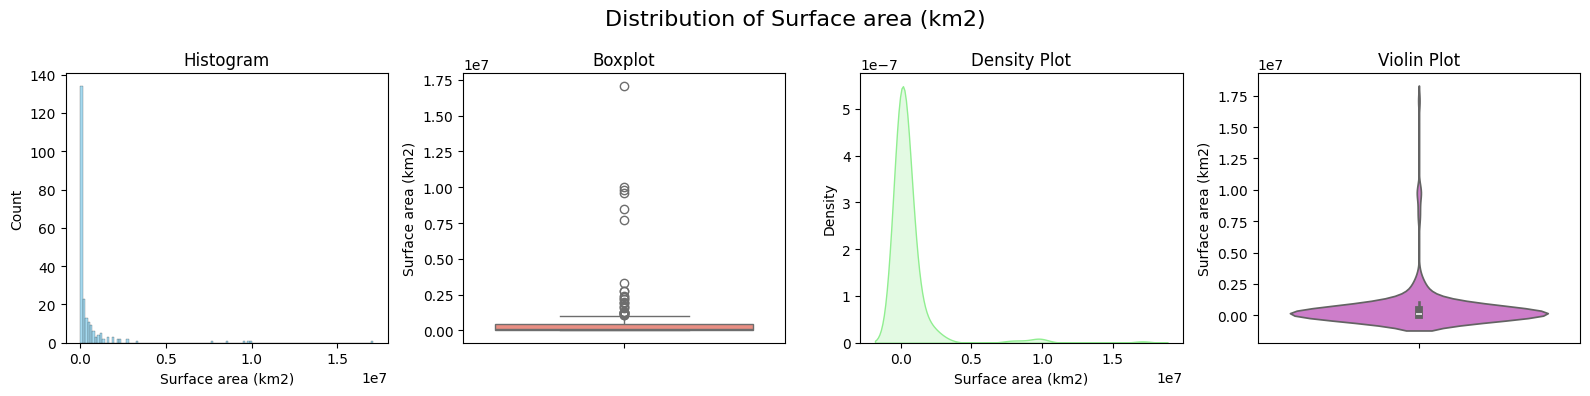

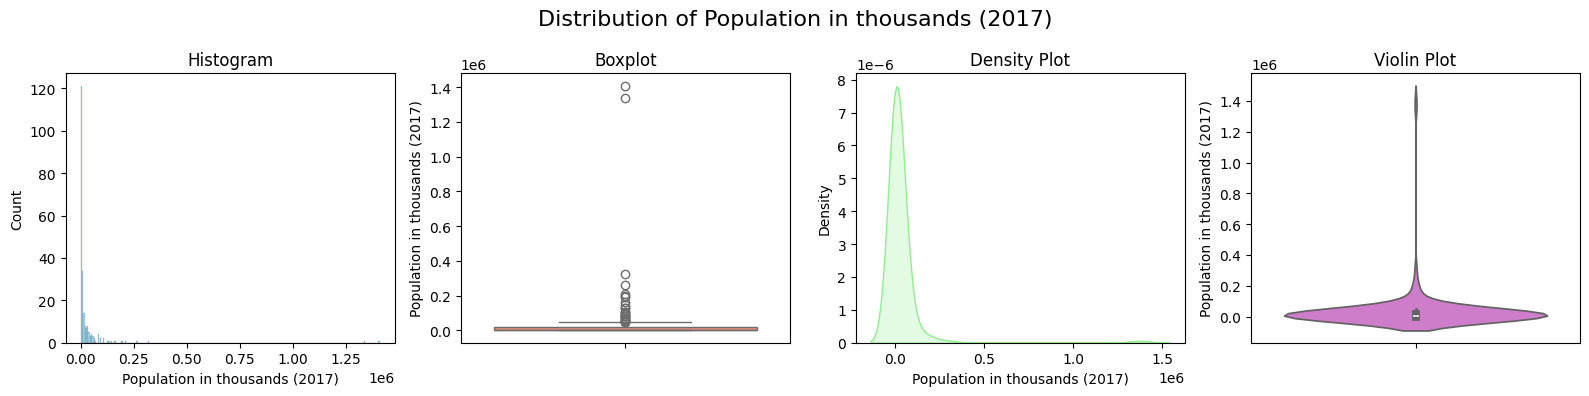

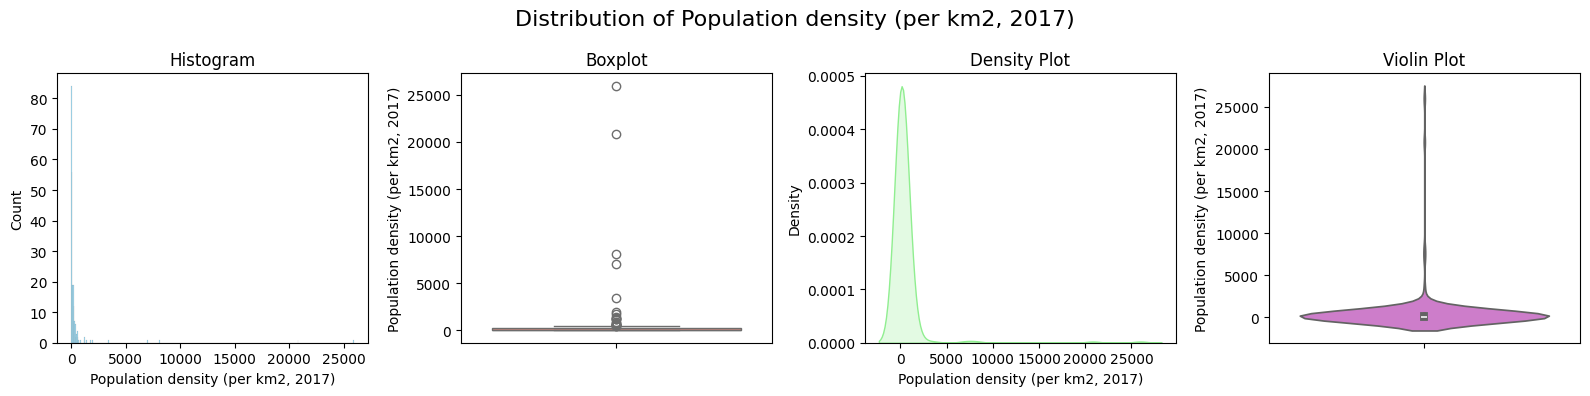

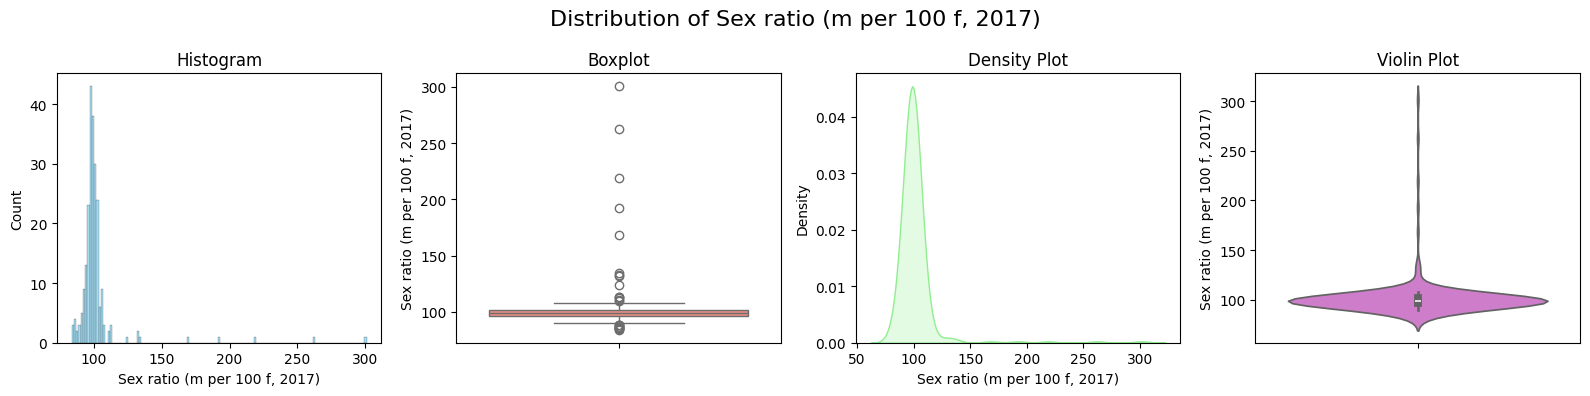

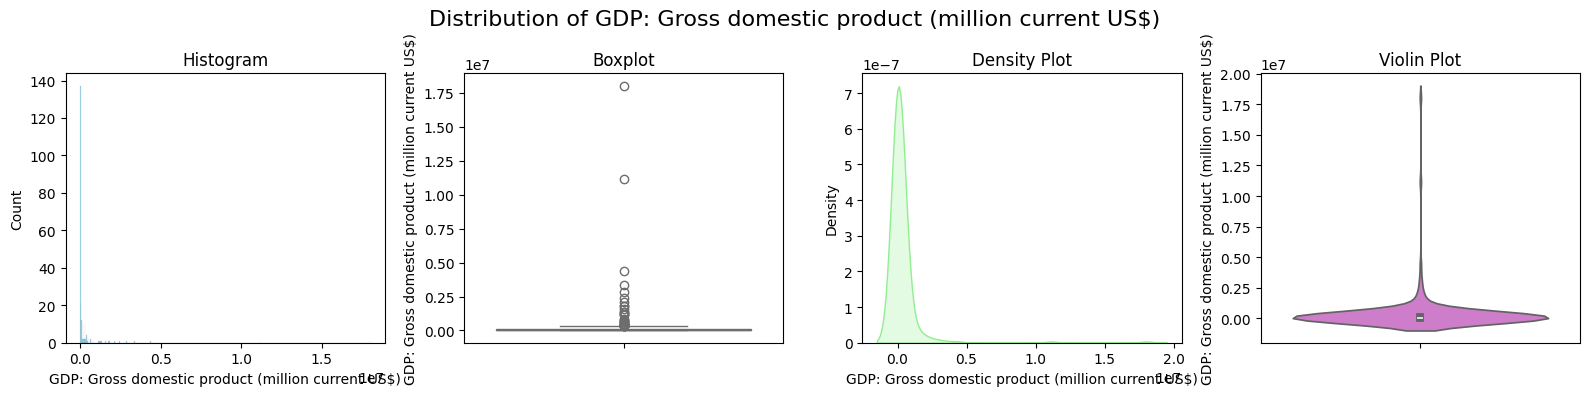

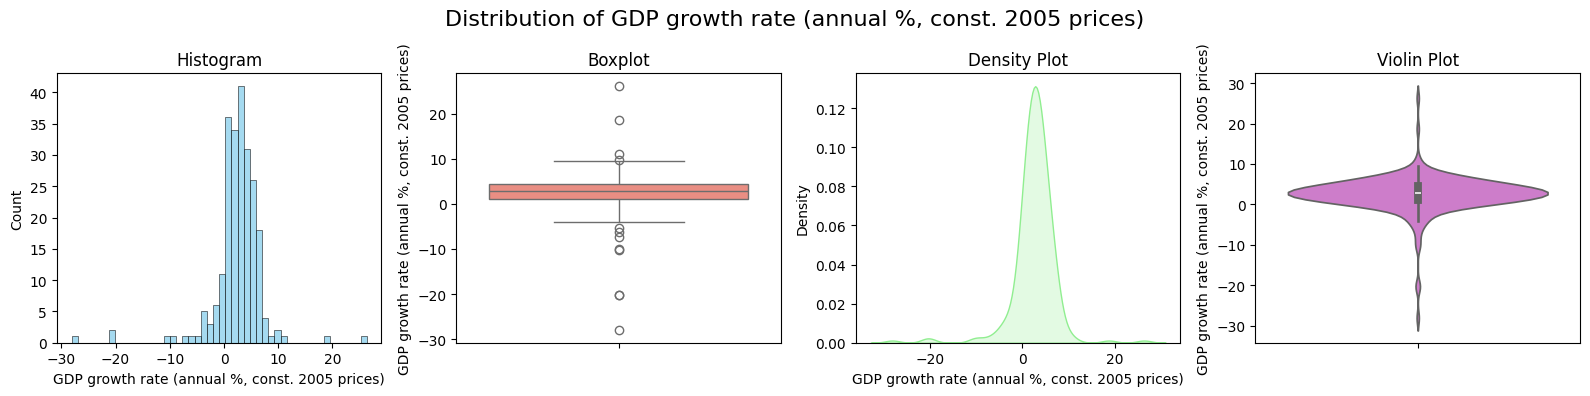

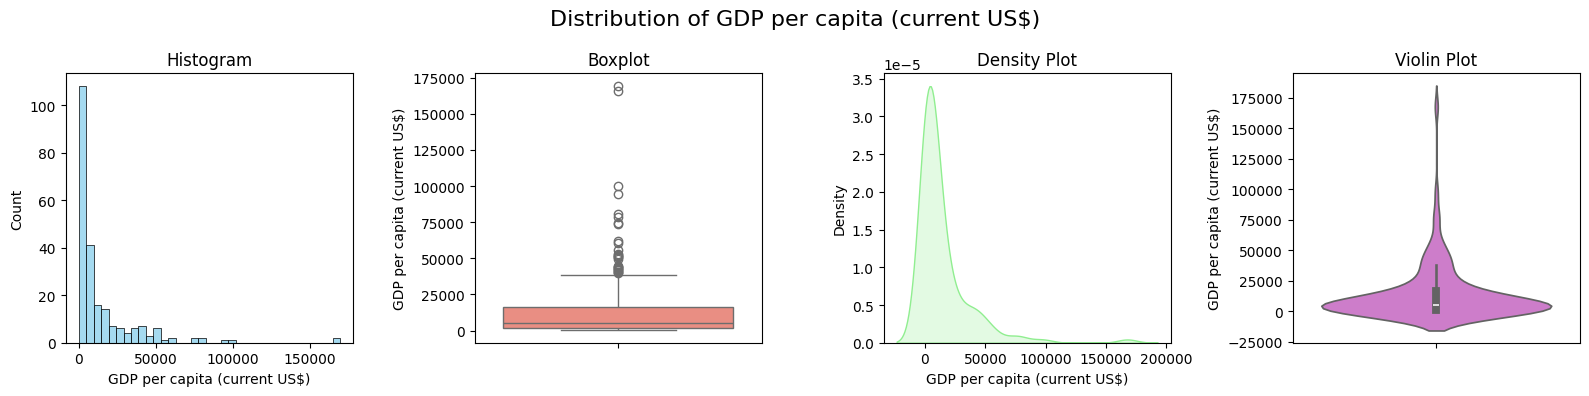

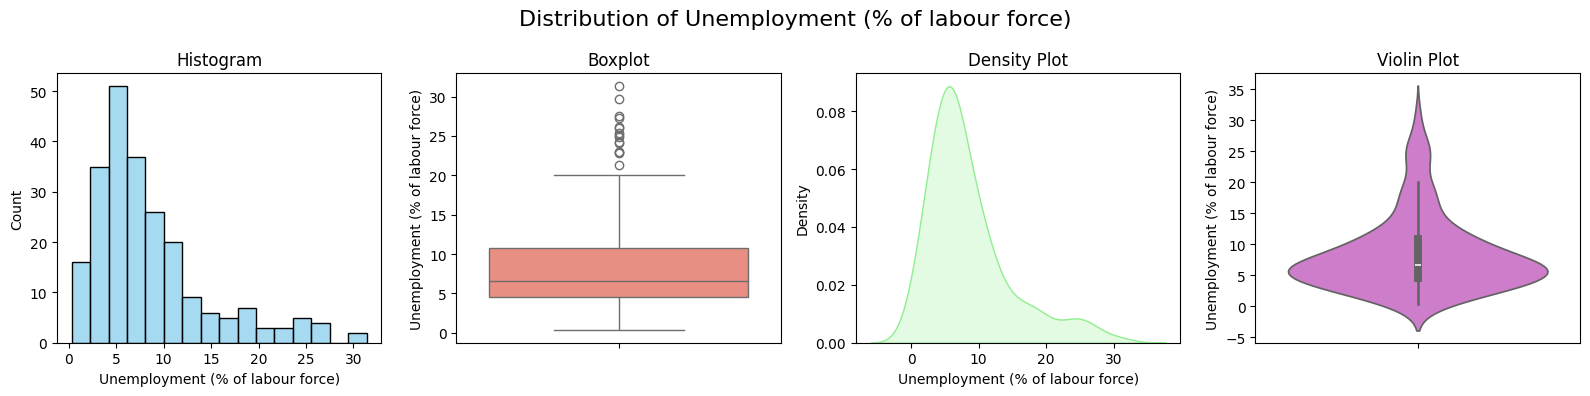

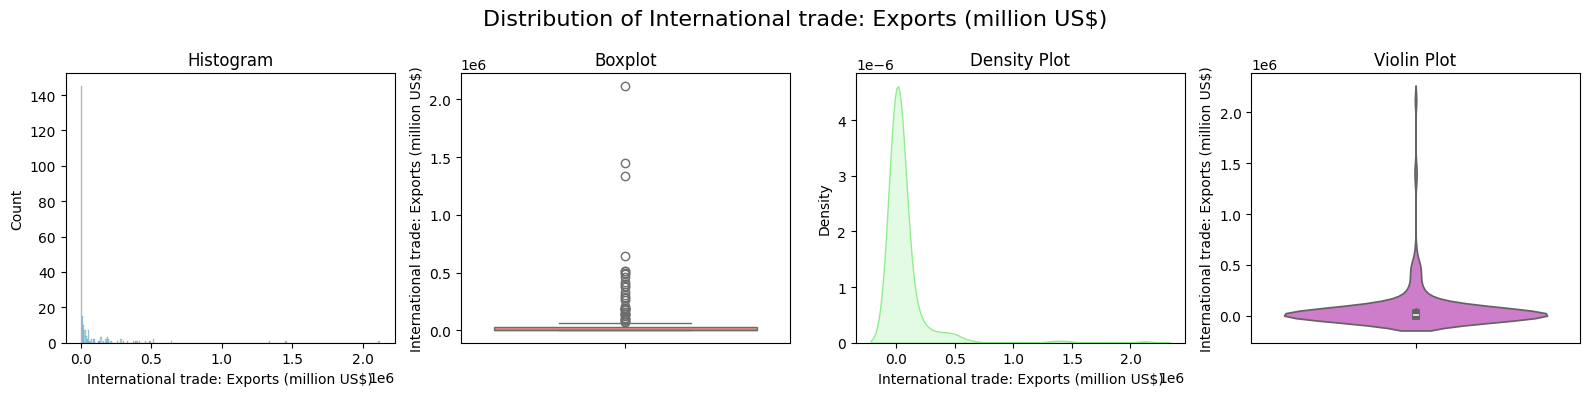

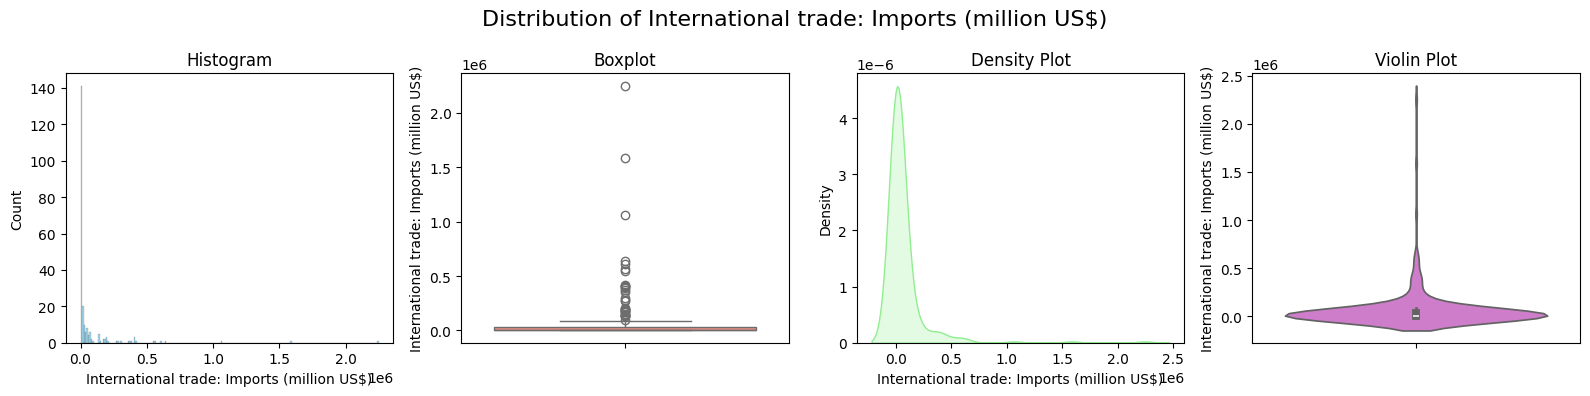

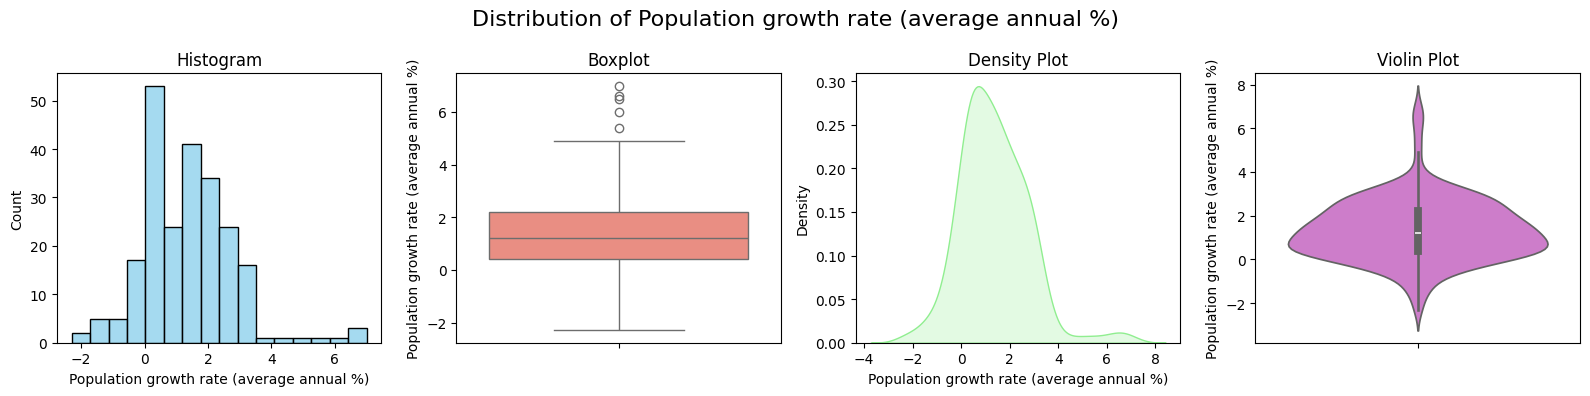

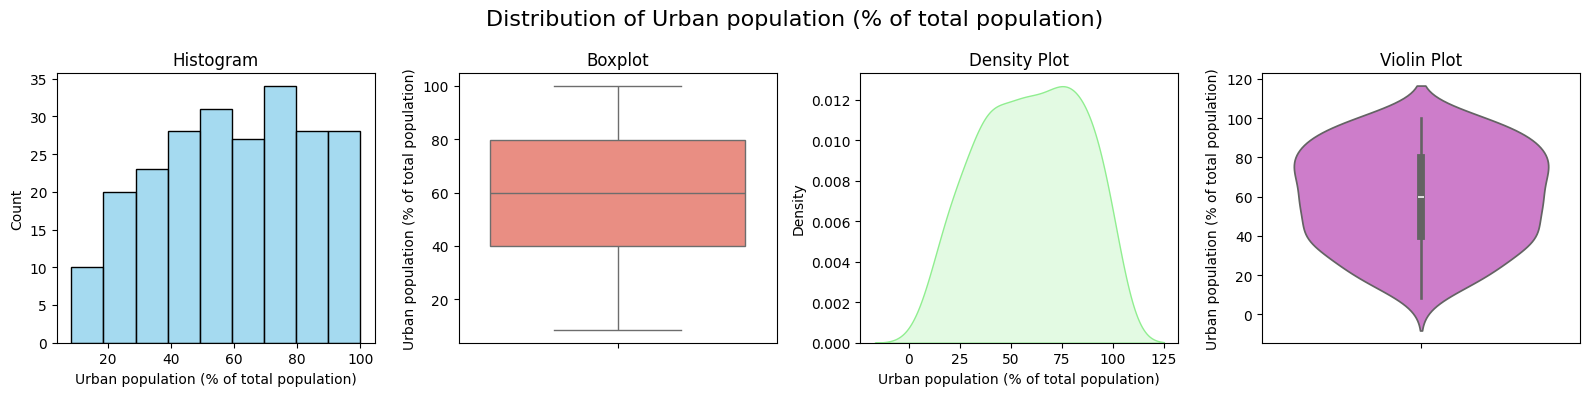

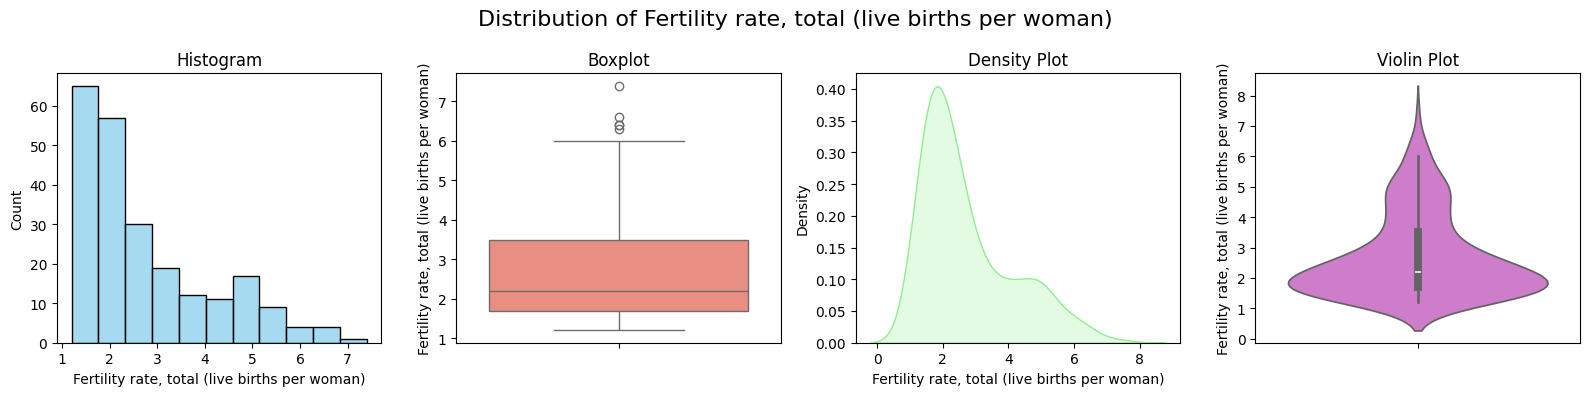

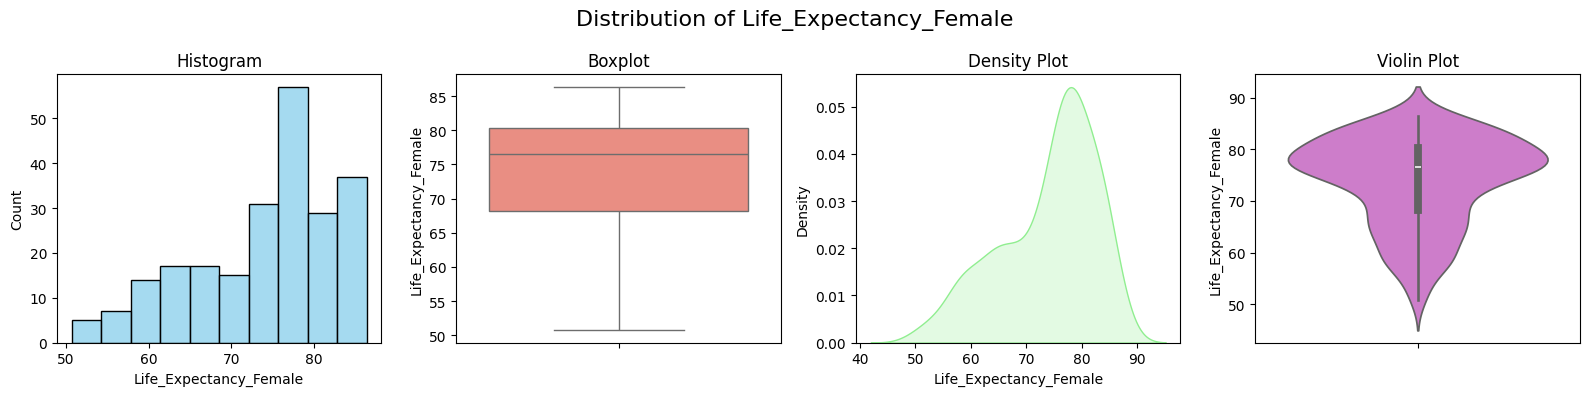

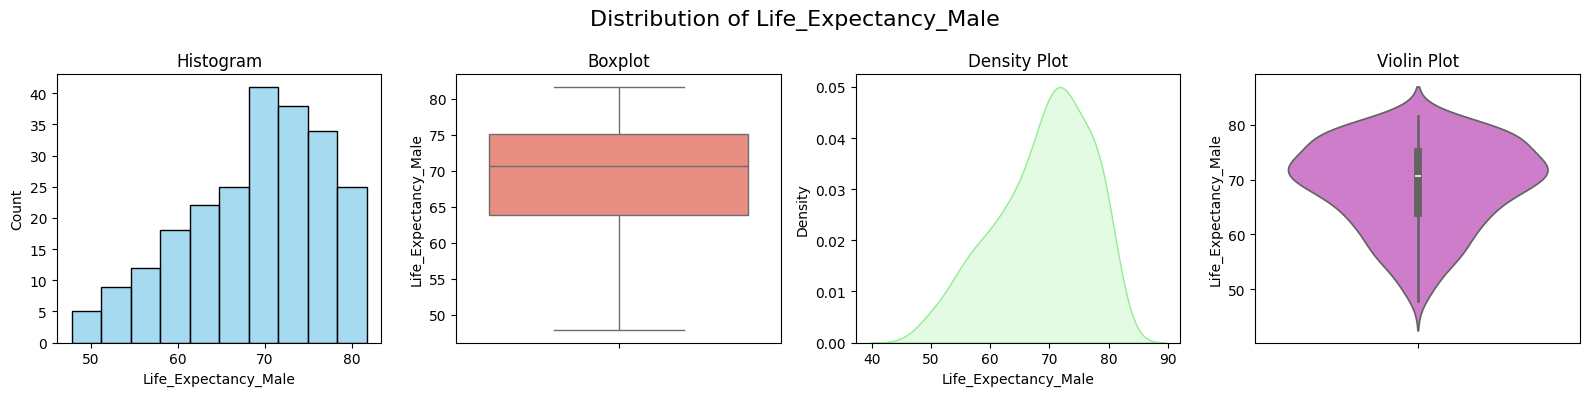

In [21]:
for col in numerical_cols:
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 4, 1)
    sns.histplot(df[col].dropna(), kde=False, color='skyblue')
    plt.title('Histogram')

    plt.subplot(1, 4, 2)
    sns.boxplot(df[col].dropna(), color='salmon')
    plt.title('Boxplot')

    plt.subplot(1, 4, 3)
    sns.kdeplot(df[col].dropna(), fill=True, color='lightgreen')
    plt.title('Density Plot')

    plt.subplot(1, 4, 4)
    sns.violinplot(df[col].dropna(), color='orchid')
    plt.title('Violin Plot')

    plt.suptitle(f'Distribution of {col}', fontsize=16)
    plt.tight_layout()
    plt.show()

### B. Categorical Variables

#### i. Mode

In [22]:
mode_region = df['Region'].mode()[0]
print("Most common region:", mode_region)

Most common region: Caribbean


#### ii. Visualization

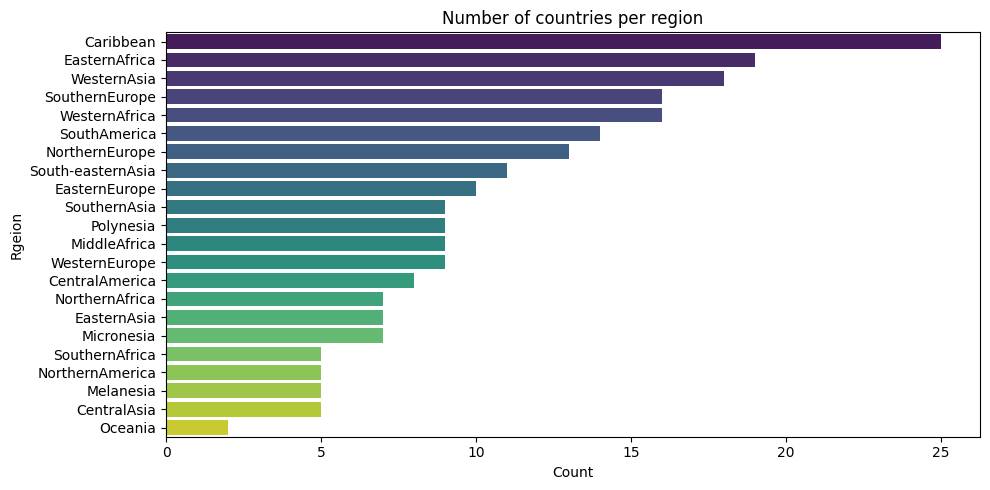

In [32]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Region', order=df['Region'].value_counts().index, palette='viridis')
plt.title('Number of countries per region')
plt.xlabel('Count')
plt.ylabel('Rgeion')
plt.tight_layout()
plt.show()

## 3. Bivariate Analysis

### A. Numerical vs Numerical

#### i. Scatter plots

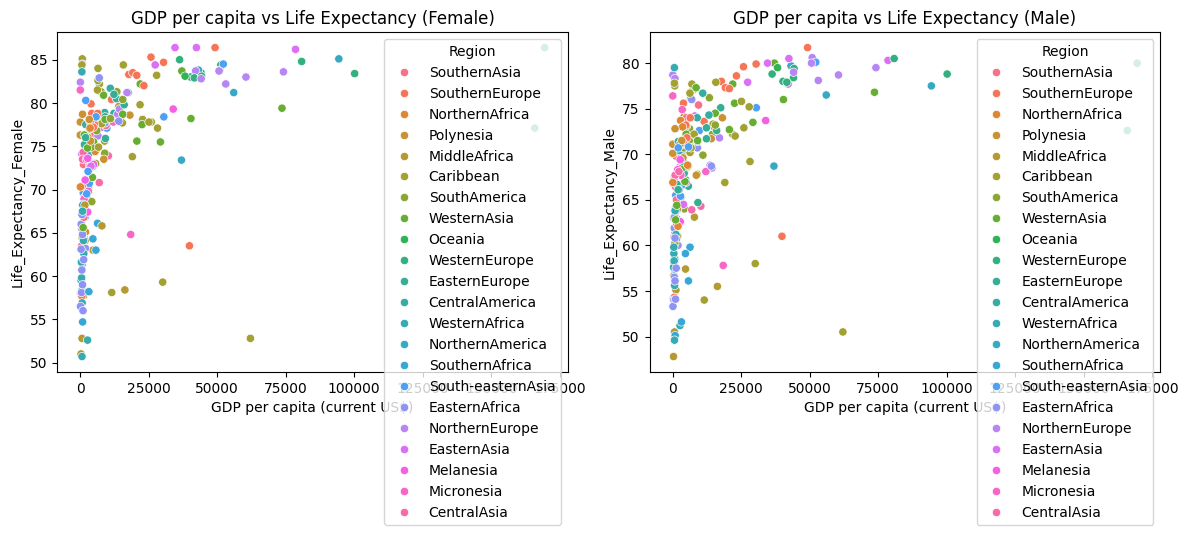

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(df, x='GDP per capita (current US$)', y='Life_Expectancy_Female', hue='Region')
plt.title('GDP per capita vs Life Expectancy (Female)')

plt.subplot(1, 2, 2)
sns.scatterplot(df, x='GDP per capita (current US$)', y='Life_Expectancy_Male', hue='Region')
plt.title('GDP per capita vs Life Expectancy (Male)')

plt.tight_layout()
plt.show()

#### ii. Correlation Matrix

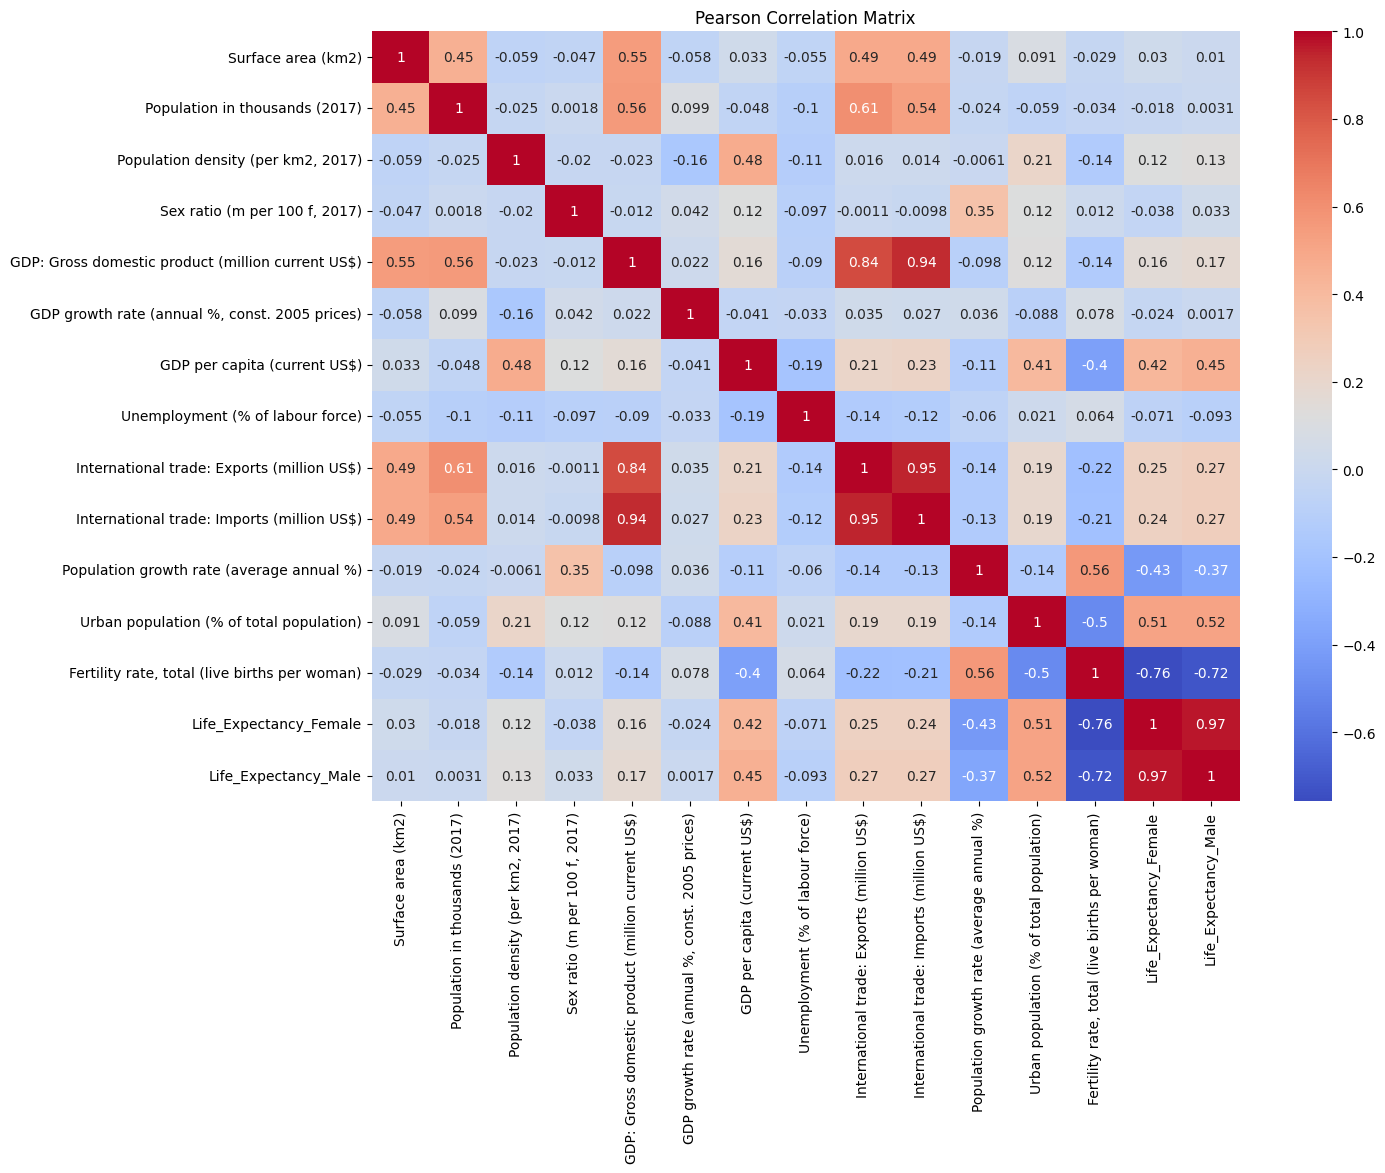

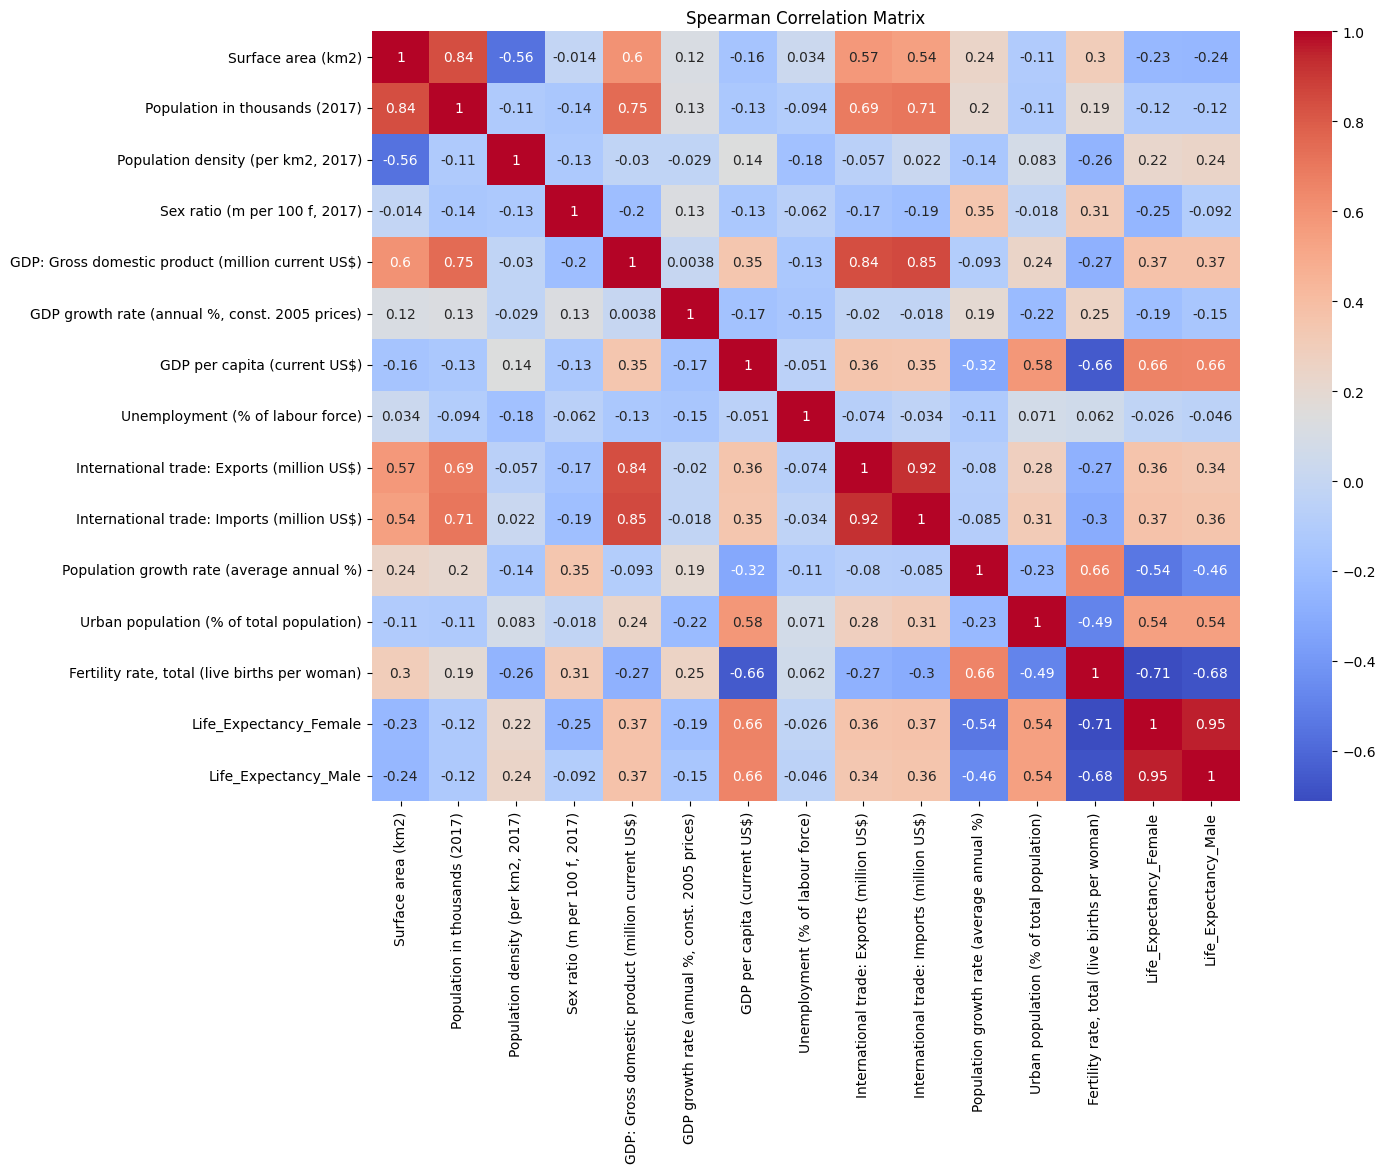

In [16]:
plt.figure(figsize=(14, 10))
sns.heatmap(df[numerical_cols].corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(14, 10))
sns.heatmap(df[numerical_cols].corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

#### iii. Pair Plots

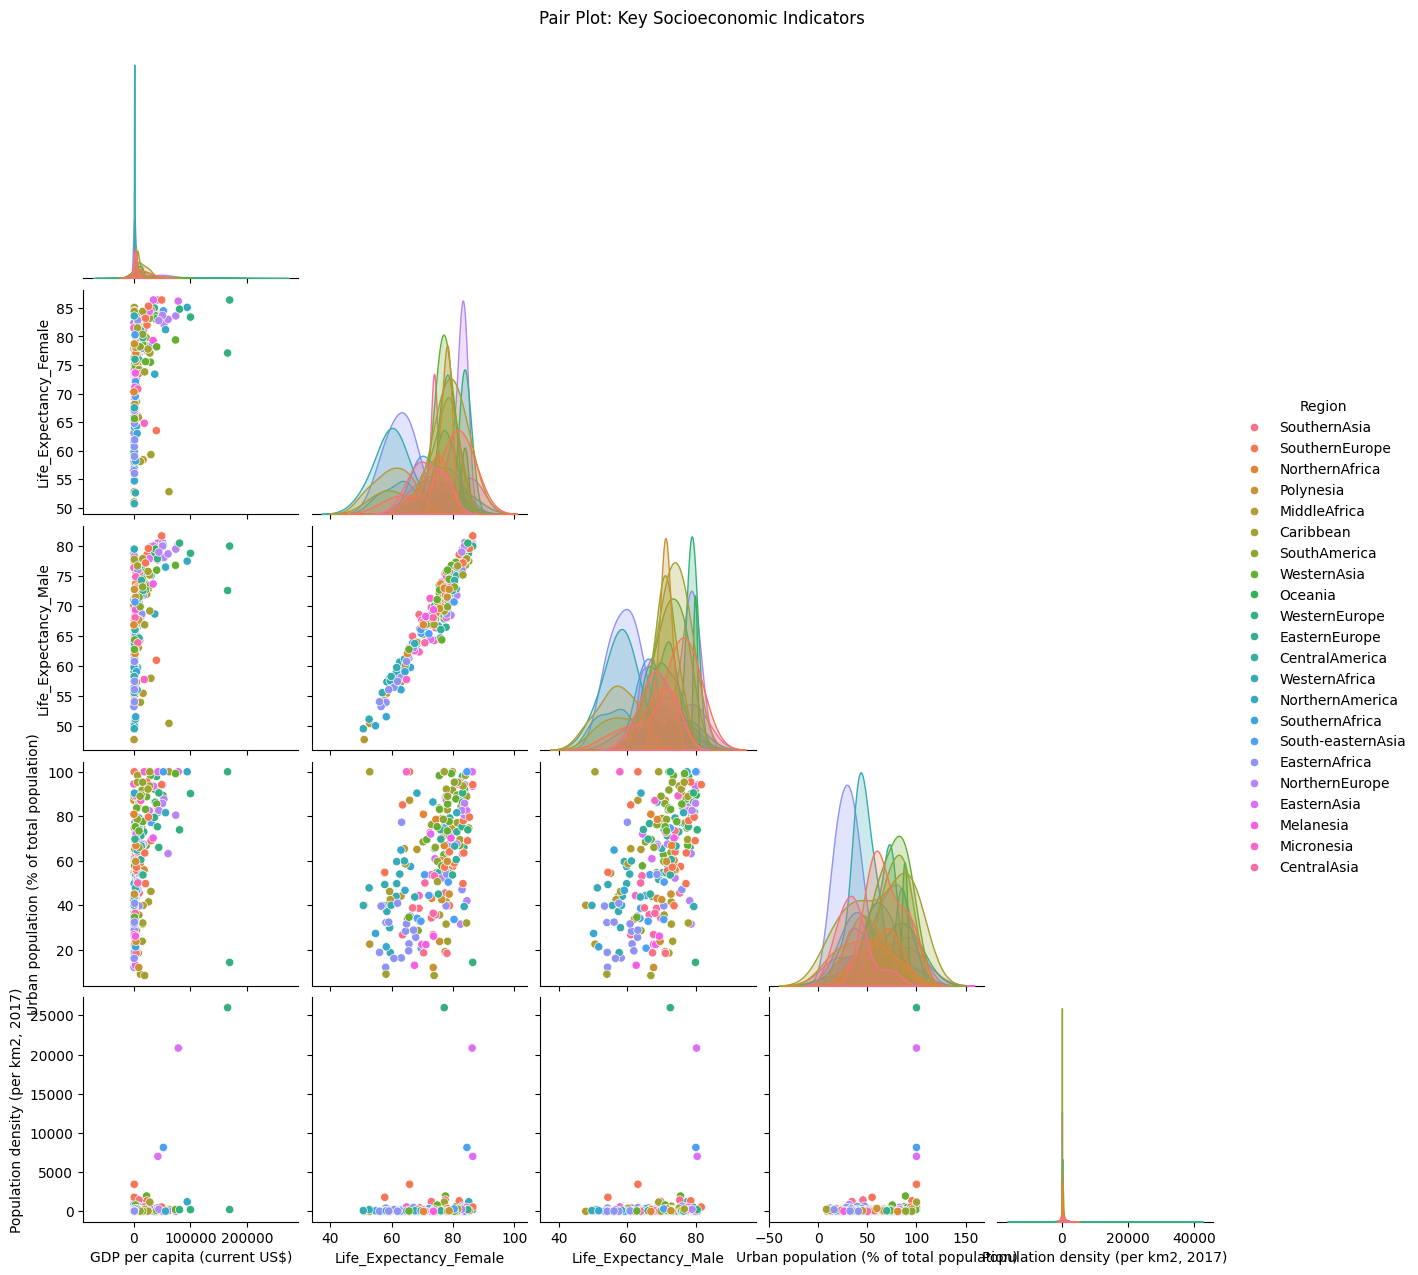

In [22]:
selected_features = ['GDP per capita (current US$)', 'Life_Expectancy_Female',
                     'Life_Expectancy_Male', 'Urban population (% of total population)',
                     'Population density (per km2, 2017)']

sns.pairplot(df[selected_features+['Region']], hue='Region', corner=True)
plt.suptitle('Pair Plot: Key Socioeconomic Indicators', y=1.02)
plt.show()

### B. Categorical vs Numerical